# Logistic Regression
- A classification algorithm, outputs probability of y = 1
- Works over `Signmoid function`
- Build in 2 steps:
    > 1. Calculate z(x), i.e., f(x) for linear regression 
    > 2. Calculate g(z) = sigmoid(z)

## 1. Sigmoid Function

The formula for a sigmoid function is as follows -  

$$ g(z) = \frac{1}{1+e^{-z}} \tag{1}$$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_plot(*args):
    cols = len(args[0])
    # print(len(args), args)
    fig, ax = plt.subplots(1,cols, figsize=(12,6))
    for i in range(cols):
        ax[i].plot(args[0][i],args[1][i], "-o", c="red") # See the range 1e21 , 1e43 on left top corner
    plt.show()

### i) Plot Exponential Function np.exp(x) 

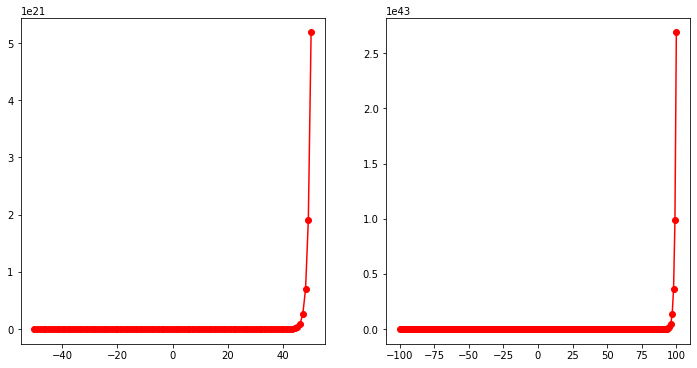

In [3]:
x1 = np.arange(-50,51) # -50 > 50
ex1 = np.exp(x1)
x2 = np.arange(-100,101) # -100 > 100
ex2 = np.exp(x2)

show_plot([x1,x2], [ex1,ex2]) # See the range 1e21 , 1e43 on left top corner

### ii) Sigmoid Function Implementation

In [4]:
# Sigmoid
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### iii) Plot Sigmoid Function

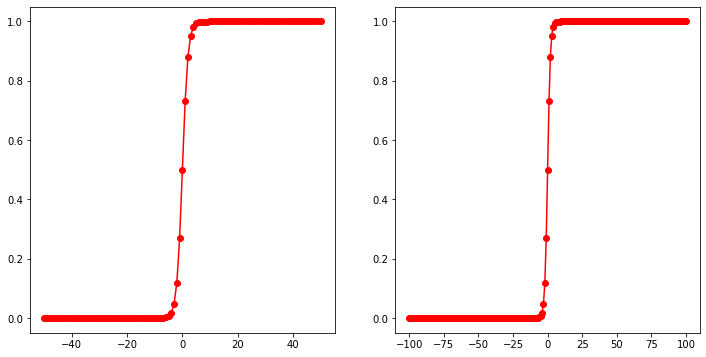

In [5]:
x1 = np.arange(-50,51) # -50 > 50
z1 = sigmoid(x1)
x2 = np.arange(-100,101) # -100 > 100
z2 = sigmoid(x2)


show_plot([x1,x2], [z1,z2]) # See the range 1e21 , 1e43 on left top corner

## 2. Cost Function for Logistic Regression

### i) Dataset

In [6]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (6, 2)
y_train shape: (6,)


### ii) Define Cost Function

In [7]:
def compute_cost_logistic(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        z = np.dot(w, x[i]) + b
        # f_wb = 1 / (1 + np.exp(-z))
        f_wb = sigmoid(z)
        cost = -y[i]*np.log(f_wb) - (1-y[i])*np.log(1 - f_wb)
        total_cost += cost
    total_cost /= m
    return total_cost

### iii) Check Cost 

In [8]:
w_tmp = np.array([1,1])
b_tmp = -3
cost = compute_cost_logistic(x_train, y_train, w_tmp, b_tmp)
print(f"Cost: {cost}")

expected_cost = 0.36686678640551745
print(f"Cost equal to expected cost: {cost == expected_cost}")

Cost: 0.36686678640551745
Cost equal to expected cost: True


In [9]:
w_array1 = np.array([1,1]) # w0 = 1, w1 = 1
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(x_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(x_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


## 3. Gradient Descent for Logistic Regression

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   


### i) Compute Gradient

In [10]:
def compute_gradient_logistic(x, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = x.shape  # m > rows,  n cols (features)
    dj_dw = np.zeros((n,))  #(n,)
    dj_db = 0 

    for i in range(m):
      z = np.dot(w, x[i]) + b  #(n,)(n,)=scalar
      f_wb = sigmoid(z)
      err_i = f_wb - y[i] #scalar
      dj_db += err_i

      for j in range(n):
        dj_dw[j] += err_i * x[i,j]
    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_dw, dj_db

In [11]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

### ii) Gradient Descent Code

In [12]:
def gradient_descent(x, y, w, b, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    steps = num_iters // 10

    for i in range(num_iters):
        # compute cost
        cost = compute_cost_logistic(x,y,w,b)
        J_history.append(cost)
        
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient_logistic(x,y,w,b)
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % steps == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
        
    return w, b, J_history         #return final w,b and J history for graphing

### iii) Check Gradient Descent

In [13]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6931471805599453
Iteration 1000: Cost 0.1592335649264797
Iteration 2000: Cost 0.08464109524940833
Iteration 3000: Cost 0.05707199929670009
Iteration 4000: Cost 0.042918276134429036
Iteration 5000: Cost 0.03434535175949304
Iteration 6000: Cost 0.028608582605098992
Iteration 7000: Cost 0.024505087438574217
Iteration 8000: Cost 0.021426396760803046
Iteration 9000: Cost 0.019032264597755078

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


## 4. Logistic Regression using Scikit-Learn

In [14]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [15]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X,y)

LogisticRegression()

In [16]:
y_pred = logR.predict(X)
print("Prediction on training set:", y_pred)
print("Accuracy on training set:", logR.score(X, y))

Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0


### [Go to Home](../)